# Konfigurasi Darknet

In [ ]:
import cv2
import numpy as np
import random
import time
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrives

In [ ]:
%cd /mydrives/yolov3

/content/drive/My Drive/yolov3


In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15412, done.
remote: Total 15412 (delta 0), reused 0 (delta 0), pack-reused 15412
Receiving objects: 100% (15412/15412), 14.05 MiB | 5.35 MiB/s, done.
Resolving deltas: 100% (10354/10354), done.
Checking out files: 100% (2050/2050), done.


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile
!make

/content/drive/My Drive/yolov3/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration

In [ ]:
!cp cfg/yolov3-tiny.cfg cfg/yolov3_training.cfg
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3_training.cfg
!sed -i 's/steps=400000,450000/steps=800,3200/' cfg/yolov3_training.cfg
!sed -i 's/classes=80/classes=2/' cfg/yolov3_training.cfg

In [ ]:
import re
def perubahan_params(data_cfg):
  # Untuk mengubah nilai filters berdasarkan kelas (kelas + 5) * 3
  data_cfg = re.sub("pad=\d{1,}\nfilters=\d{1,}","pad=1\nfilters=21",data_cfg) 
  return data_cfg


with open("cfg/yolov3_training.cfg", "r") as f:
     data_modif = perubahan_params(f.read())

with open("cfg/yolov3_training.cfg", "w") as f:
     f.write(data_modif)
     

In [ ]:
!echo -e 'wearing_mask\nnot_wearing_mask' > data/obj.names
!echo -e 'classes= 2\ntrain= data/train.txt\nvalid= data/test.txt\nnames= data/obj.names\nbackup= /mydrives/yolov3/backup/V1' > data/obj.data

In [ ]:
!cp data/obj.names /mydrives/yolov3/backup/V1/obj.names

In [ ]:
!mkdir data/obj

# Extract dataset

In [ ]:
!unzip '/content/drive/MyDrive/yolov3/dataset-cv.zip' -d data/obj

Archive:  /content/drive/MyDrive/yolov3/dataset-cv.zip
   creating: data/obj/dataset-cv/
  inflating: data/obj/dataset-cv/classes.txt  
  inflating: data/obj/dataset-cv/gambar10Masker.jpg  
  inflating: data/obj/dataset-cv/gambar10Masker.txt  
  inflating: data/obj/dataset-cv/gambar11.jpg  
  inflating: data/obj/dataset-cv/gambar11.txt  
  inflating: data/obj/dataset-cv/gambar1Masker.jpg  
  inflating: data/obj/dataset-cv/gambar1Masker.txt  
  inflating: data/obj/dataset-cv/gambar1NoMasker.jpg  
  inflating: data/obj/dataset-cv/gambar1NoMasker.txt  
  inflating: data/obj/dataset-cv/gambar2Masker.jpg  
  inflating: data/obj/dataset-cv/gambar2Masker.txt  
  inflating: data/obj/dataset-cv/gambar2NoMasker.jpg  
  inflating: data/obj/dataset-cv/gambar2NoMasker.txt  
  inflating: data/obj/dataset-cv/gambar3Masker.jpg  
  inflating: data/obj/dataset-cv/gambar3Masker.txt  
  inflating: data/obj/dataset-cv/gambar4Masker.jpg  
  inflating: data/obj/dataset-cv/gambar4Masker.txt  
  inflating: dat

In [ ]:
import glob
# Memasukan semua path image ke dalam images_list
images_list = glob.glob("data/obj/dataset-cv/*.jpg")
images_list

['data/obj/dataset-cv/gambar10Masker.jpg',
 'data/obj/dataset-cv/gambar11.jpg',
 'data/obj/dataset-cv/gambar1Masker.jpg',
 'data/obj/dataset-cv/gambar1NoMasker.jpg',
 'data/obj/dataset-cv/gambar2Masker.jpg',
 'data/obj/dataset-cv/gambar2NoMasker.jpg',
 'data/obj/dataset-cv/gambar3Masker.jpg',
 'data/obj/dataset-cv/gambar4Masker.jpg',
 'data/obj/dataset-cv/gambar5Masker.jpg',
 'data/obj/dataset-cv/gambar6Masker.jpg',
 'data/obj/dataset-cv/gambar7Masker.jpg',
 'data/obj/dataset-cv/gambar8Masker.jpg',
 'data/obj/dataset-cv/gambar9Masker.jpg',
 'data/obj/dataset-cv/gambar12.jpg',
 'data/obj/dataset-cv/gambar13.jpg',
 'data/obj/dataset-cv/gambar14Masker.jpg',
 'data/obj/dataset-cv/gambar15.jpg',
 'data/obj/dataset-cv/gambar16.jpg',
 'data/obj/dataset-cv/gambar17.jpg',
 'data/obj/dataset-cv/gambar18.jpg',
 'data/obj/dataset-cv/gambar19.jpg',
 'data/obj/dataset-cv/gambar20.jpg',
 'data/obj/dataset-cv/gambar21.jpg',
 'data/obj/dataset-cv/gambar22.jpg',
 'data/obj/dataset-cv/gambar3NoMasker.jpg

In [ ]:
with open("data/train.txt", "w") as f:
    f.write("\n".join(images_list))

with open("data/test.txt", "w") as f:
    f.write("\n".join(images_list))

# Pengunduhan pre-trained model

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-04-07 10:59:01--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  30.9MB/s    in 5.3s    

2022-04-07 10:59:07 (29.3 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
"""
  Digunakan untuk melakukan training pertama kali
"""
# !./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show -map
"""
  Digunakan untuk melanjutkan training dengan weight yang telah tersimpan
"""
!./darknet detector train data/obj.data cfg/yolov3_training.cfg /mydrives/yolov3/backup/yolov3_training_last.weights -dont_show -map 

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 Prepare additional network for mAP calculation...
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max           

# Testing

In [ ]:
# Penyalin file konfigurasi yolov3_training ke dalam yolov3_testing
!cp cfg/yolov3_training.cfg cfg/yolov3_testing.cfg
# Mengganti konfigurasi batch dan subdivision = 1
!sed -i 's/batch=64/batch=1/' cfg/yolov3_testing.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' cfg/yolov3_testing.cfg

In [ ]:
# Pengujian mAP
!./darknet detector map data/obj.data cfg/yolov3_testing.cfg /mydrives/yolov3/backup/yolov3_training_best.weights -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256   

* Mean Average Precision = 55.39%
* Recall = 55%
* F1 = 55% 
* Average IoU = 38.22%

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
Couldn't open file: cfg/yolov3_testing.cfg


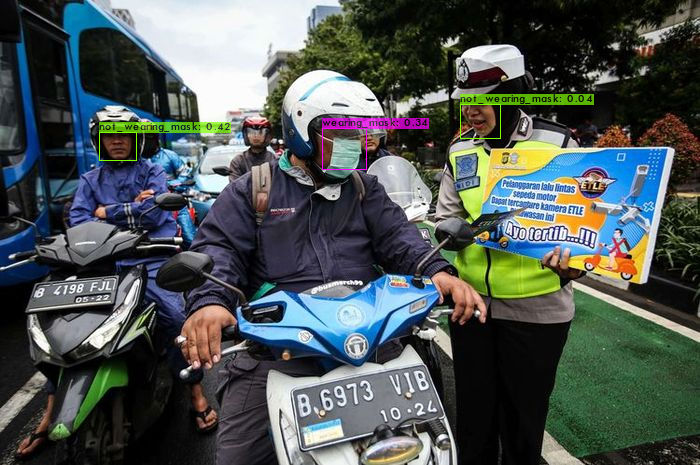

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

!./darknet detector test data/obj.data cfg/yolov3_testing.cfg /mydrives/yolov3/backup/V1/yolov3_training_best.weights /mydrives/yolov3/testing/MaskerTest.jpg -thresh 0.1
image = cv2.imread("predictions.jpg")
cv2_imshow(image)

In [ ]:
net = cv2.dnn.readNet("/mydrives/yolov3/backup/V1/yolov3_training_best.weights", "cfg/yolov3_testing.cfg")

[INFO] Waktu deteksi yolo 0.454424 detik
0
1
0
0
[[1]
 [0]]
['masker', 'no masker']


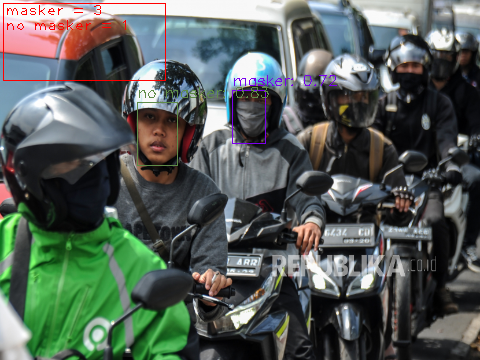

In [ ]:
from google.colab.patches import cv2_imshow
classes = ["masker","no masker"]
images_path = glob.glob(r"/content/drive/MyDrive/yolov3/testing/NoMaskerTest4.jpg") #ganti dengan direktori gambar anda
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))
random.shuffle(images_path)
for img_path in images_path:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (480,360))
    height, width, channels = img.shape

    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    start = time.time()
    outs = net.forward(output_layers)
    end = time.time()
    print("[INFO] Waktu deteksi yolo {:.6f} detik".format(end - start))

    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
                print(class_id)
                
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    font = cv2.FONT_HERSHEY_PLAIN
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    unique, counts = np.unique(class_ids, return_counts=True)
    tambah=0
    cv2.rectangle(img, (3, 3), (165, 80), (0,0,255), 1)
    for i in range (len(counts)):
                    cv2.putText(img,str(classes[i])+" = "+str(counts[i]), (5,15+tambah),font,1, (0,0,255), 1)
                    tambah=tambah+15
    print(indexes)
    daftar=[]
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            daftar.append(label)
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 1)
            text = "{}: {:.2f}".format(label, confidences[i])
            cv2.putText(img, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
                        0.5, color, 1)

    print(daftar)
    cv2_imshow(img)
    key = cv2.waitKey(0)